<a href="https://colab.research.google.com/github/Gopal-Parwani/PH444_2024/blob/main/Overlayng_Insetting_two_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-28-1b18505c6753>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  inset_ax = ax.inset_axes([0.6, 0.6, 0.4, 0.1 * main_aspect / inset_aspect], transform=ax.transAxes,


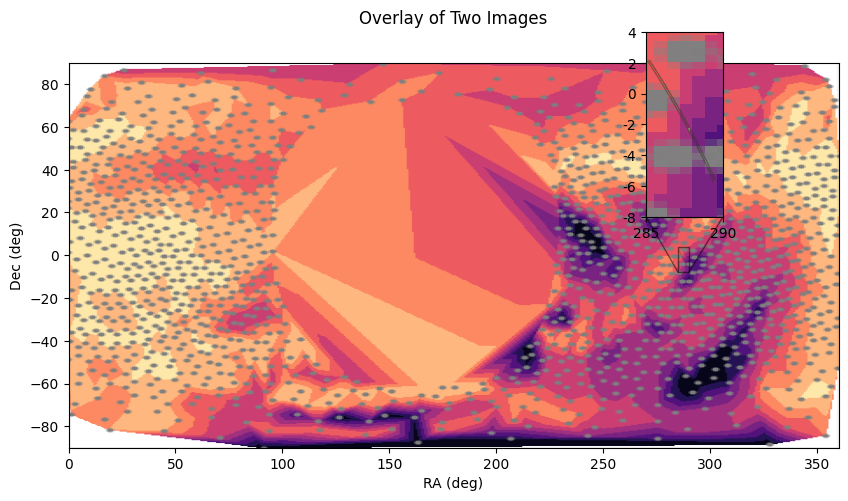

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import isclose
from PIL import Image

Tri_ra = [285, 290]
Tri_dec = [-8, 4]
# Load the images
img1 = Image.open('/Triangulation_to_overlay-removebg-preview.png')  # Adjust the paths if needed
img2 = Image.open('/GRB240802A_rd_cartesian_prob.png')

# Ensure your image arrays are numpy arrays with appropriate data types
img1_array = np.array(img1, dtype=np.uint8)  # Your img1_array data here
img2_array = np.array(img2, dtype=np.uint8)  # Your img2_array data here

fig, ax = plt.subplots(figsize=(10, 5))

# Overlay the second image with a different alpha for better visibility
ax.imshow(img2_array, extent=[0, 360, -90, 90], alpha=1)  # Adjust extent as needed
# Overlay the first image
ax.imshow(img1_array, extent=[Tri_ra[0], Tri_ra[1], Tri_dec[0], Tri_dec[1]], alpha=1)  # Adjust extent as needed

# Set the scale limits and labels
ax.set_xlim([0, 360])
ax.set_ylim([-90, 90])
ax.set_xlabel('RA (deg)')
ax.set_ylabel('Dec (deg)')
plt.title('Overlay of Two Images')

# Set the aspect ratio of the main axes
ax.set_box_aspect(0.5)

# Calculate aspect ratio of the main axes
main_aspect = (ax.get_xlim()[1] - ax.get_xlim()[0]) / (ax.get_ylim()[1] - ax.get_ylim()[0])

# Create inset axes with the same aspect ratio
inset_aspect = (Tri_ra[1]-Tri_ra[0]) / (Tri_dec[1] - Tri_dec[0])
inset_ax = ax.inset_axes([0.6, 0.6, 0.4, 0.1 * main_aspect / inset_aspect], transform=ax.transAxes,
                         xlim=[Tri_ra[0], Tri_ra[1]], ylim=[Tri_dec[0], Tri_dec[1]], xticklabels=[285, 290], yticklabels=[-8,-6, -4, -2, 0, 2, 4])

# Overlay the second image in the inset
inset_ax.imshow(img2_array, extent=[0, 360, -90, 90], alpha=1)  # Adjust extent as needed
# Overlay the first image in the inset
inset_ax.imshow(img1_array, extent=[Tri_ra[0], Tri_ra[1], Tri_dec[0], Tri_dec[1]], alpha=1)  # Adjust extent as needed

# Add zoom leaders
ax.indicate_inset_zoom(inset_ax, edgecolor="black")

plt.show()
